In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, preprocessing

In [2]:
df =pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
#df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'ZIP Code'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>,
        <AxesSubplot:title={'center':'CD Account'}>],
       [<AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

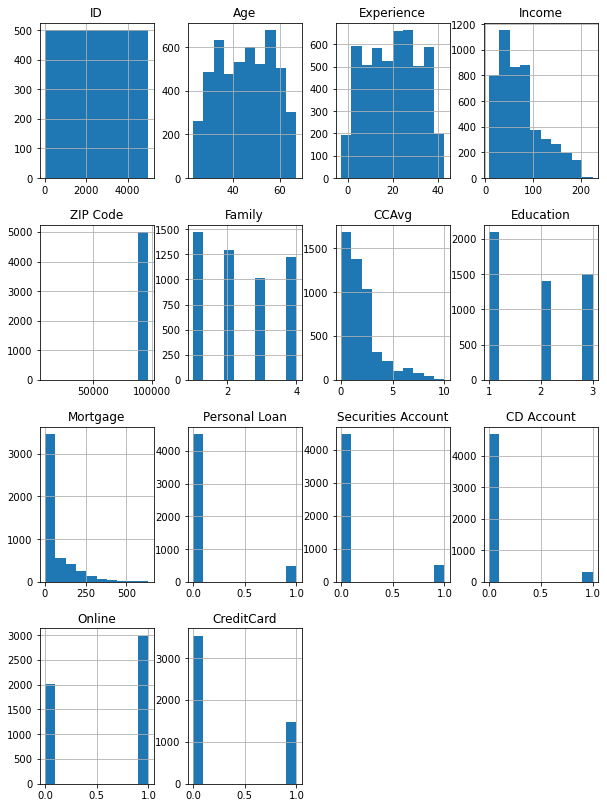

In [8]:
df.hist(figsize =(10,14))

<AxesSubplot:>

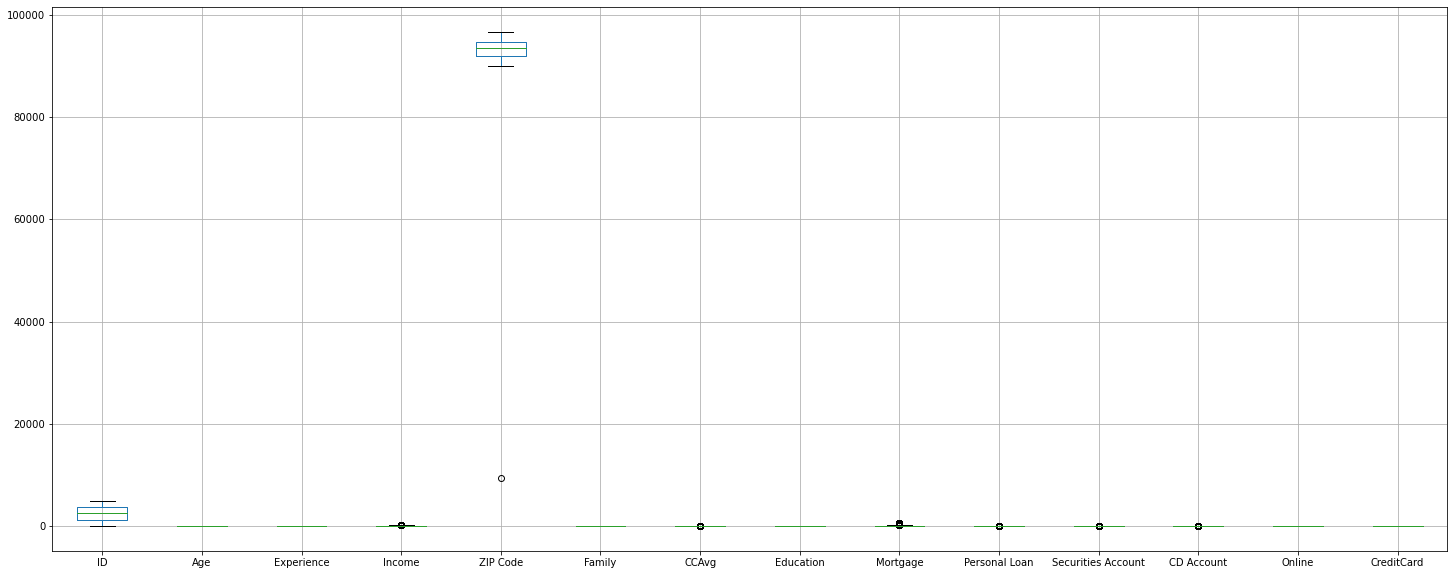

In [9]:
df.boxplot(figsize =(25,10))

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rf_model = RandomForestClassifier()

In [12]:
rf_model = RandomForestClassifier(n_estimators=1000, max_features=2,oob_score=True)

In [13]:
df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [14]:
features = ["Age","Experience","Income","Family","CCAvg","Education","Mortgage","Securities Account","CD Account","Online","CreditCard"]

In [15]:
features

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [16]:
rf_model.fit(X =df[features],y = df["Personal Loan"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
print("oob score",rf_model.oob_score_)

oob score 0.9876


In [18]:
for features,imp in zip(features,rf_model.feature_importances_):
    print(features,imp)

Age 0.0451177084607128
Experience 0.044111386121835065
Income 0.3494853046795741
Family 0.09579124182996629
CCAvg 0.18104202930409213
Education 0.16169275982527023
Mortgage 0.043359953432141524
Securities Account 0.005809009644011637
CD Account 0.05527014974097504
Online 0.008410456689338024
CreditCard 0.009910000272083067


In [19]:
tree_model = tree.DecisionTreeClassifier(max_depth=8)

In [20]:
predictors = pd.DataFrame([df["Income"],df["CCAvg"],df["Education"]]).T

In [21]:
tree_model = tree_model.fit(X = predictors , y = df["Personal Loan"] )

In [22]:
with open("Persona_Loan__dt_max_depth_8.dot",'w') as f:
        f = tree.export_graphviz(tree_model,feature_names=["Income","CCAvg","Education"],out_file=f)

In [23]:
from sklearn.tree import export_text
r = export_text(tree_model ,max_depth=8 ,feature_names = ["Income","CCAvg","Education"])

In [24]:
print(r)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CCAvg <= 0.35
|   |   |   |   |   |--- CCAvg <= 0.25
|   |   |   |   |   |   |--- Income <= 112.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Income >  112.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- CCAvg >  0.25
|   |   |   |   |   |   |--- Income <= 111.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Income >  111.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- CCAvg >  0.35
|   |   |   |   |   |--- Income <= 109.50
|   |   |   |   |   |   |--- CCAvg <= 1.75
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- CCAvg >  1.75
|   |   |   |   |   |   |   |--- CCAvg <= 1.90
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- CCAvg >  1.90
|   |   |   |   |   |   